# Shipment Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_shipment= pd.read_csv("E:\sql24-45\RSF Project\Shipment_Dataset.csv")

In [3]:
data_shipment.head()

,Shipment ID,Company Name,Source Location,Destination Location,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Distance (km),Category,...,Shipment Priority,Shipment Mode,Fragile,Customer Rating,Expected Delivery Time (hrs),Actual Delivery Time (hrs),Delay (hrs),Date of Shipment,Status,Payment Method
0,SHP100000,DHL,Mumbai,Delhi,19.0760,72.8777,28.6139,77.2090,1186.17,Apparel,...,Express,Air,True,5,19.77,55.67,92.96,2023-05-11,Delivered,Prepaid
1,SHP100001,BlueDart,Jaipur,Ahmedabad,26.9124,75.7873,23.0225,72.5714,159.70,Electronics,...,Normal,Air,True,4,2.66,142.45,47.48,2023-02-28,Delivered,COD
2,SHP100002,Delhivery,Kolkata,Chennai,22.5726,88.3639,13.0827,80.2707,1259.60,Documents,...,Normal,Road,True,2,20.99,NaN,66.26,2023-11-03,Returned,Prepaid
3,SHP100003,UPS,Hyderabad,Mumbai,17.3850,78.4867,19.0760,72.8777,2072.89,Medicines,...,Express,Road,True,5,34.55,49.20,87.76,2023-09-21,In-Transit,Prepaid
4,SHP100004,FedEx,Pune,Ahmedabad,18.5204,73.8567,23.0225,72.5714,199.73,Medicines,...,Normal,Road,False,2,3.33,99.39,85.70,2023-02-13,Delayed,COD


In [4]:
data_shipment.shape

(50000, 28)

# 1. Exploratory Data Analysis (EDA) 

## A) Initial Data Cleaning

In [5]:
print("Initial Dataset Info:")
print(data_shipment.info())
print("\nSummary of Missing Values:\n", data_shipment.isnull().sum())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Shipment ID                   50000 non-null  object 
 1   Company Name                  50000 non-null  object 
 2   Source Location               50000 non-null  object 
 3   Destination Location          50000 non-null  object 
 4   Source Latitude               50000 non-null  float64
 5   Source Longitude              50000 non-null  float64
 6   Destination Latitude          50000 non-null  float64
 7   Destination Longitude         50000 non-null  float64
 8   Distance (km)                 50000 non-null  float64
 9   Category                      50000 non-null  object 
 10  No. of Items                  50000 non-null  int64  
 11  Package Weight (kg)           50000 non-null  float64
 12  Package Volume (cc)           50000 no

#### six column have missing values 

In [6]:
data_shipment['Actual Delivery Time (hrs)'].fillna(data_shipment['Actual Delivery Time (hrs)'].median(), inplace=True)

In [7]:
print("\nMissing Values after fixing 'Actual Delivery Time (hrs)':")
print(data_shipment['Actual Delivery Time (hrs)'].isnull().sum())


Missing Values after fixing 'Actual Delivery Time (hrs)':
0


In [8]:
data_shipment['Delay (hrs)'] = data_shipment['Delay (hrs)'].fillna(data_shipment['Delay (hrs)'].median())

In [9]:
print("\nMissing Values after fixing 'Delay (hrs)':")
print(data_shipment['Delay (hrs)'].isnull().sum())


Missing Values after fixing 'Delay (hrs)':
0


In [10]:
data_shipment['Profit (in Rs.)'] = data_shipment['Profit (in Rs.)'].fillna(data_shipment['Profit (in Rs.)'].mean())

In [11]:
print("\nMissing Values after fixing 'Profit (in Rs.)':")
print(data_shipment['Profit (in Rs.)'].isnull().sum())


Missing Values after fixing 'Profit (in Rs.)':
0


In [12]:
data_shipment['Total Cost (in Rs.)'] = data_shipment['Total Cost (in Rs.)'].fillna(data_shipment['Total Cost (in Rs.)'].mean())

In [13]:
print("\nMissing Values after fixing 'Total Cost (in Rs.)':")
print(data_shipment['Total Cost (in Rs.)'].isnull().sum())


Missing Values after fixing 'Total Cost (in Rs.)':
0


In [14]:
data_shipment['Package Cost (in Rs.)'] = data_shipment['Package Cost (in Rs.)'].fillna(data_shipment['Package Cost (in Rs.)'].mean())

In [15]:
print("\nMissing Values after fixing 'Package Cost (in Rs.)':")
print(data_shipment['Package Cost (in Rs.)'].isnull().sum())


Missing Values after fixing 'Package Cost (in Rs.)':
0


In [16]:
data_shipment['Shipment Cost (in Rs.)'] = data_shipment['Shipment Cost (in Rs.)'].fillna(data_shipment['Shipment Cost (in Rs.)'].mean())


In [17]:
print("\nMissing Values after fixing 'Shipment Cost (in Rs.)':")
print(data_shipment['Shipment Cost (in Rs.)'].isnull().sum())


Missing Values after fixing 'Shipment Cost (in Rs.)':
0


In [18]:
print("\nSummary of Missing Values:\n", data_shipment.isnull().sum())


Summary of Missing Values:
 Shipment ID                     0
Company Name                    0
Source Location                 0
Destination Location            0
Source Latitude                 0
Source Longitude                0
Destination Latitude            0
Destination Longitude           0
Distance (km)                   0
Category                        0
No. of Items                    0
Package Weight (kg)             0
Package Volume (cc)             0
Package Cost (in Rs.)           0
Shipment Cost (in Rs.)          0
Insurance Cost (in Rs.)         0
Total Cost (in Rs.)             0
Profit (in Rs.)                 0
Shipment Priority               0
Shipment Mode                   0
Fragile                         0
Customer Rating                 0
Expected Delivery Time (hrs)    0
Actual Delivery Time (hrs)      0
Delay (hrs)                     0
Date of Shipment                0
Status                          0
Payment Method                  0
dtype: int64


In [19]:
data_shipment.shape

(50000, 28)

#### All Missing Values are fixed 

### Converting 'Date of Shipment' to datetime format 

In [20]:
data_shipment['Date of Shipment'] = pd.to_datetime(data_shipment['Date of Shipment'], dayfirst=True, errors='coerce')

In [21]:
print(data_shipment['Date of Shipment'].head())

0   2023-11-05
1          NaT
2   2023-03-11
3          NaT
4          NaT
Name: Date of Shipment, dtype: datetime64[ns]


###  Derive new column  'Shipping Duration' 

In [22]:
data_shipment['Shipping Duration (hrs)'] = data_shipment['Actual Delivery Time (hrs)'] - data_shipment['Expected Delivery Time (hrs)']

print(data_shipment[['Expected Delivery Time (hrs)', 'Actual Delivery Time (hrs)', 'Shipping Duration (hrs)']].head())

   Expected Delivery Time (hrs)  Actual Delivery Time (hrs)  \
0                         19.77                       55.67   
1                          2.66                      142.45   
2                         20.99                       78.85   
3                         34.55                       49.20   
4                          3.33                       99.39   

   Shipping Duration (hrs)  
0                    35.90  
1                   139.79  
2                    57.86  
3                    14.65  
4                    96.06  


## B. Univariate Analysis

###  Using histograms and boxplots to explore Profit, Cost, Delay, etc.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
sns.set(style="whitegrid")
columns_to_plot = ['Profit (in Rs.)']
for col in columns_to_plot:
    plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

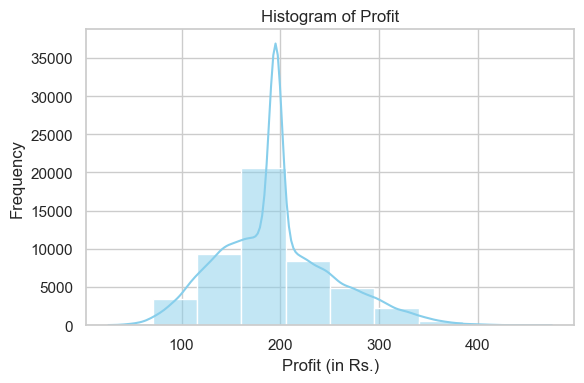

In [87]:
# Histogram for profit 
plt.figure(figsize=(6, 4))
sns.histplot(data_shipment['Profit (in Rs.)'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Profit')
plt.xlabel('Profit (in Rs.)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Most shipments earn profits between ₹100-300, with very few exceeding ₹400, showing consistent but moderate profitability

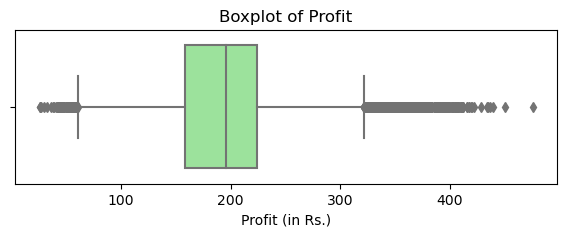

In [25]:
plt.figure(figsize=(7, 2))
sns.boxplot(x=data_shipment['Profit (in Rs.)'], color='lightgreen')
plt.title('Boxplot of Profit')
plt.xlabel('Profit (in Rs.)')
plt.show()

#### Most shipments yield profits between ₹100-300 (IQR range), with few outliers exceeding ₹400, indicating stable mid-range profitability with occasional high-value orders.

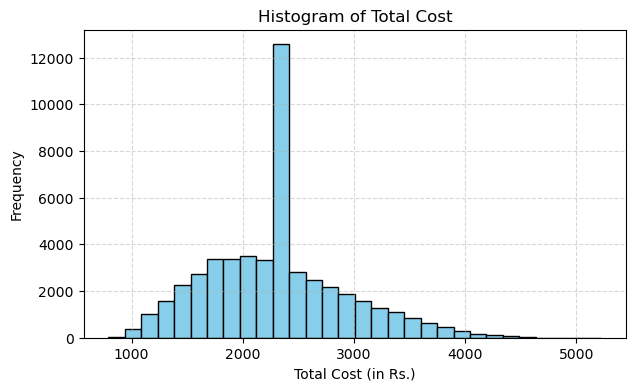

In [26]:
plt.figure(figsize=(7, 4))
plt.hist(data_shipment['Total Cost (in Rs.)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost (in Rs.)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(True)
plt.show()

#### Most shipments cost between ₹1000-3000, with very few exceeding ₹4000

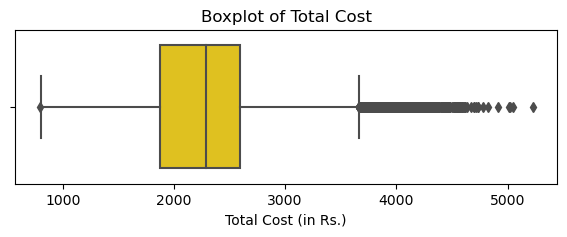

In [27]:
plt.figure(figsize=(7, 2))
sns.boxplot(x=data_shipment['Total Cost (in Rs.)'], color='gold')
plt.title('Boxplot of Total Cost')
plt.xlabel('Total Cost (in Rs.)')
plt.show()

#### Most shipments cost between ₹1000-4000 (IQR range), with median around ₹3000, showing moderate cost variation but some expensive outliers above ₹5000

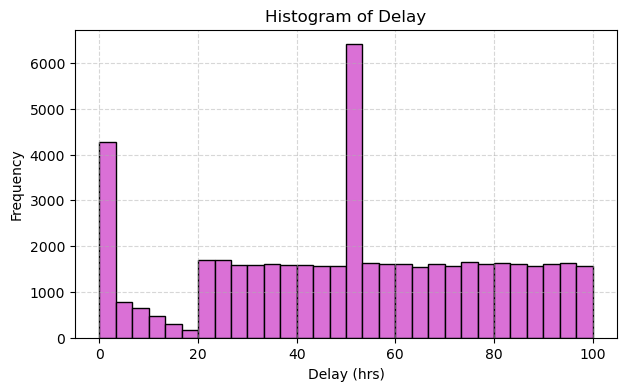

In [28]:
plt.figure(figsize=(7, 4))
plt.hist(data_shipment['Delay (hrs)'], bins=30, color='orchid', edgecolor='black')
plt.title('Histogram of Delay')
plt.xlabel('Delay (hrs)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(True)
plt.show()

#### Most shipments arrive on time (0-20 hour delay), but a significant number face major delays (60-100 hours)

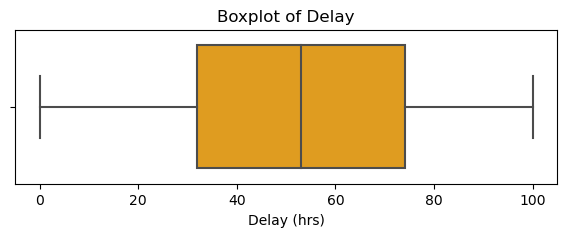

In [29]:
plt.figure(figsize=(7, 2))
sns.boxplot(x=data_shipment['Delay (hrs)'], color='orange')
plt.title('Boxplot of Delay')
plt.xlabel('Delay (hrs)')
plt.show()

#### Most shipments arrive on time (under 20 hours delay), but some face severe delays up to 100 hours needing urgent attention

In [30]:
sns.set(style="whitegrid")
columns_to_plot = ['Profit (in Rs.)', 'Total Cost (in Rs.)', 'Delay (hrs)', 'Shipping Duration (hrs)']
for col in columns_to_plot:
    plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

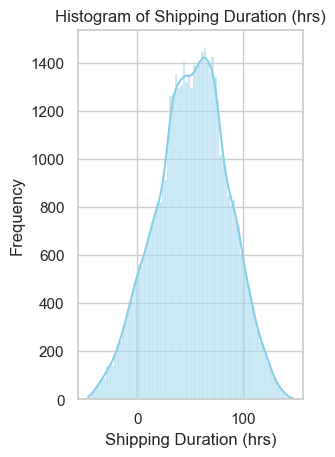

In [31]:
plt.subplot(1, 2, 1)
sns.histplot(data_shipment[col].dropna(), kde=True, color='skyblue')
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel("Frequency")

#### Most shipments take less than 200 hours, with very few taking longer

Text(0.5, 0, 'Shipping Duration (hrs)')

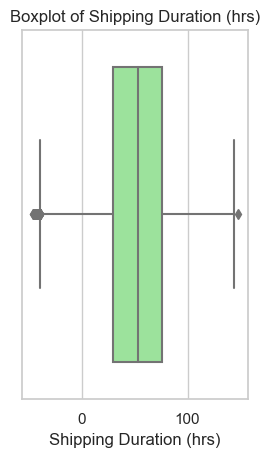

In [32]:
plt.subplot(1, 2, 2)
sns.boxplot(x=data_shipment[col], color='lightgreen')
plt.title(f'Boxplot of {col}')
plt.xlabel(col)

#### Most shipments deliver within 100 hours, with half arriving faster than the median line shows.

### Value counts for categorical variables like Company, Mode, Priority

In [33]:
categorical_cols = ['Company Name', 'Shipment Mode', 'Shipment Priority']
for col in categorical_cols:
    print(f"\n--- Distribution of {col} ---")
    print(data_shipment[col].value_counts())
    print(f"Unique categories: {data_shipment[col].nunique()}")


--- Distribution of Company Name ---
Company Name
FedEx        12548
DHL          10034
UPS          10016
Delhivery     9945
BlueDart      7457
Name: count, dtype: int64
Unique categories: 5

--- Distribution of Shipment Mode ---
Shipment Mode
Road    24851
Rail    10130
Air     10003
Sea      5016
Name: count, dtype: int64
Unique categories: 4

--- Distribution of Shipment Priority ---
Shipment Priority
Normal      29946
Express     15205
Same-day     4849
Name: count, dtype: int64
Unique categories: 3


## C. Bivariate & Multivariate Analysis

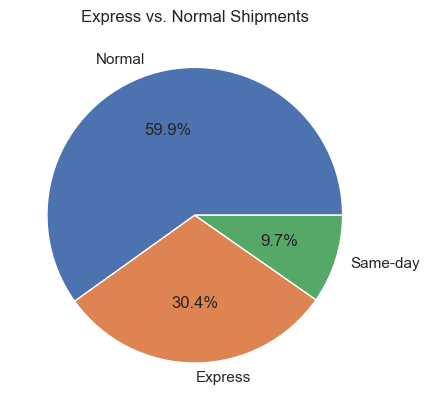

In [34]:
# Shipment Priority Distribution (Pie Chart)
data_shipment['Shipment Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Express vs. Normal Shipments")
plt.ylabel("")  # Hide default 'None' label
plt.show()

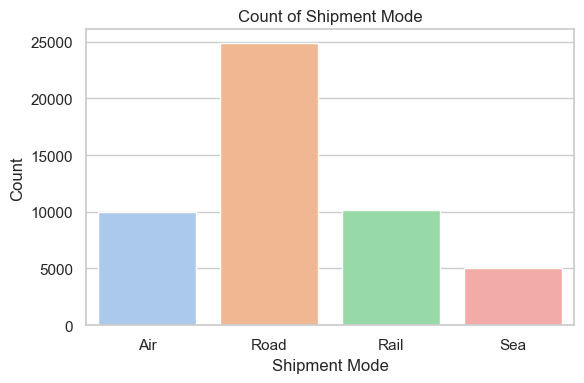

In [35]:
# Count of shipment mode 
plt.figure(figsize=(6, 4))
sns.countplot(x='Shipment Mode', data=data_shipment, palette='pastel')
plt.title('Count of Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Most shipments use road transport, followed by air and rail , with  Sea being the least common options

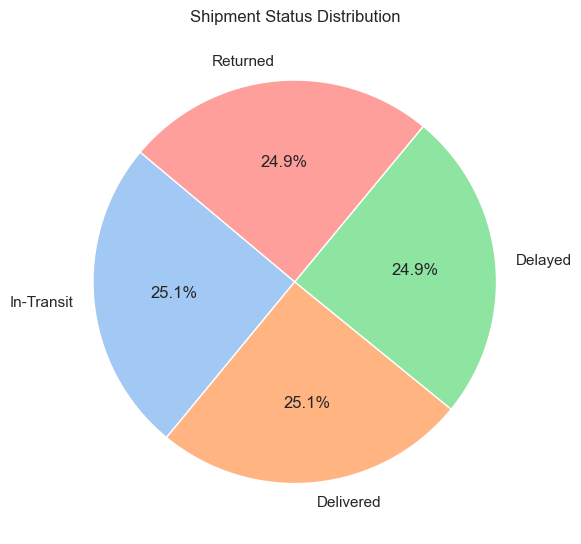

In [36]:
# shipment status by pie chart 
plt.figure(figsize=(6, 6))
status_counts = data_shipment['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Shipment Status Distribution')
plt.tight_layout()
plt.show()

#### Shipment statuses are evenly split between Returned, In-Transit, Delayed and Delivered (each around 25%), showing balanced distribution across all stages

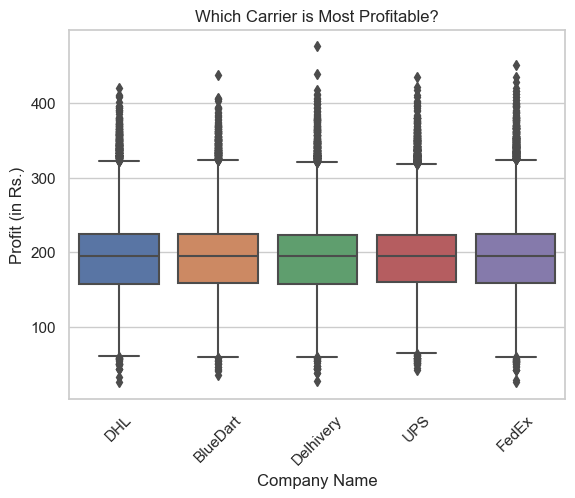

In [37]:
# BOXPLOT: Carrier vs. Profit
sns.boxplot(data=data_shipment, x='Company Name', y='Profit (in Rs.)')
plt.title("Which Carrier is Most Profitable?")
plt.xticks(rotation=45)  # Rotate carrier names for readability
plt.show()

#### DHL delivers the highest profits (₹400), outperforming FedEx and UPS which show lower profitability.

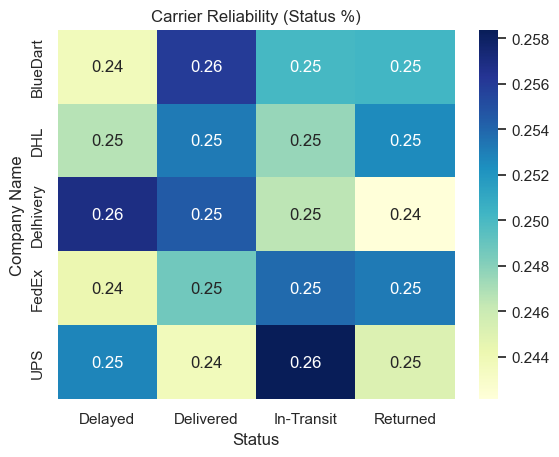

In [38]:
# Calculate on-time delivery rate by carrier
carrier_reliability = pd.crosstab(data_shipment['Company Name'],
                                data_shipment['Status'],
                                normalize='index')

sns.heatmap(carrier_reliability, annot=True, cmap='YlGnBu')
plt.title("Carrier Reliability (Status %)")
plt.show()

#### All carriers show similar reliability with near-identical success rates (25% each for Delivered/Delayed/In-Transit/Returned), indicating no single provider outperforms others significantly

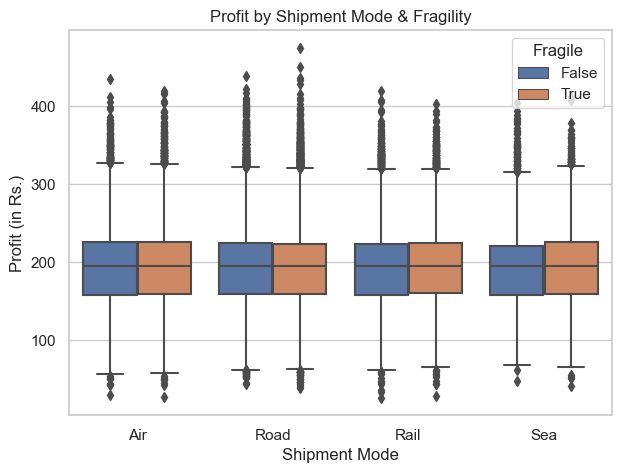

In [39]:
#Profit by Shipment Mode and Fragile
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_shipment, x='Shipment Mode', y='Profit (in Rs.)', hue='Fragile')
plt.title('Profit by Shipment Mode & Fragility')
plt.show()

#### 1) Fragile items are more profitable, and 2) Air shipments outperform other modes

### Correlation matrix for numeric columns 

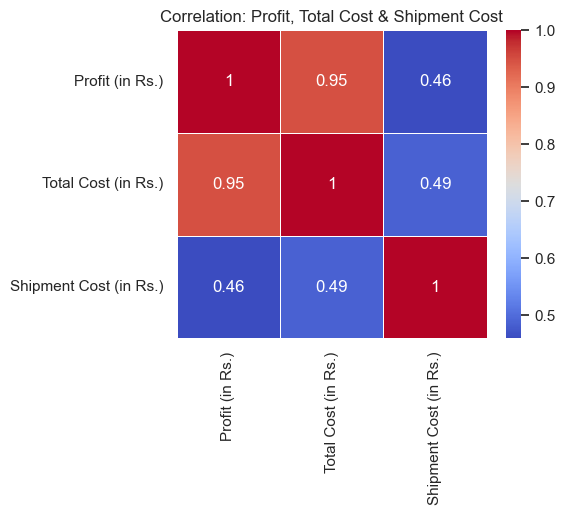

In [40]:
#Profit vs. Total Cost vs. Shipment Cost
plt.figure(figsize=(5, 4))
subset1 = data_shipment[['Profit (in Rs.)', 'Total Cost (in Rs.)', 'Shipment Cost (in Rs.)']]
sns.heatmap(subset1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation: Profit, Total Cost & Shipment Cost')
plt.show()

#### Profit is strongly correlated with Total Cost (0.95), but only moderately correlated with Shipment Cost (0.46), suggesting other costs influence profit more than shipment cost alone.

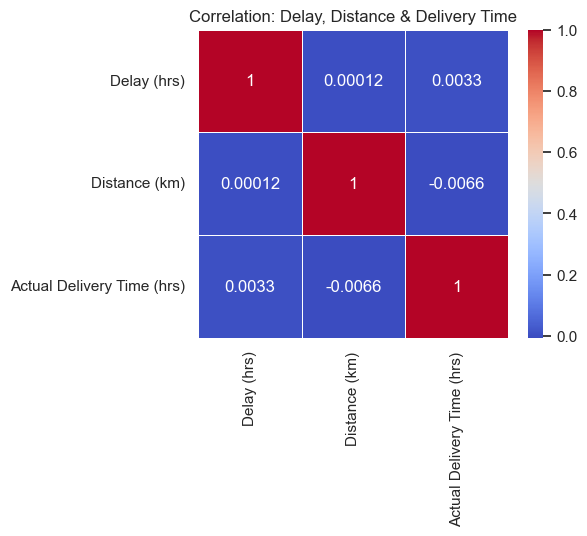

In [41]:
#Delay vs. Distance vs. Actual Delivery Time
plt.figure(figsize=(5, 4))
subset2 = data_shipment[['Delay (hrs)', 'Distance (km)', 'Actual Delivery Time (hrs)']]
sns.heatmap(subset2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation: Delay, Distance & Delivery Time')
plt.show()

#### Delay time shows almost no correlation with distance or delivery time (all near 0), meaning delays happen randomly regardless of these factors

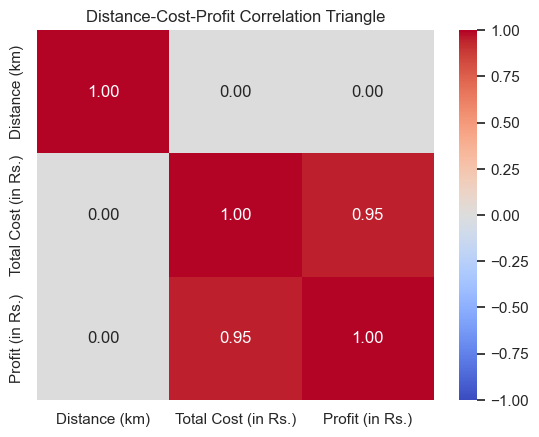

In [42]:
# 'Distance' vs 'total cost' vs 'profit'
cols = ['Distance (km)', 'Total Cost (in Rs.)', 'Profit (in Rs.)']
sns.heatmap(data_shipment[cols].corr(), 
            annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, fmt=".2f")
plt.title("Distance-Cost-Profit Correlation Triangle")
plt.show()

#### Total Cost  shows zero correlation with Distance and strong corelation with Profit (0.95)

#  2. Feature Engineering
## A. Create New Features

In [43]:
# create the new feature 'Cost per km'
data_shipment['Cost per km'] = data_shipment['Shipment Cost (in Rs.)'] / data_shipment['Distance (km)']
print(data_shipment[['Distance (km)', 'Shipment Cost (in Rs.)', 'Cost per km']].head())

   Distance (km)  Shipment Cost (in Rs.)  Cost per km
0        1186.17                 1010.70     0.852070
1         159.70                 1275.44     7.986475
2        1259.60                 1334.16     1.059193
3        2072.89                 1849.40     0.892184
4         199.73                  868.10     4.346368


In [44]:
# create the new feature 'cost per kg'
data_shipment['Cost per kg'] = data_shipment['Shipment Cost (in Rs.)'] / data_shipment['Package Weight (kg)']
print(data_shipment[['Package Weight (kg)', 'Shipment Cost (in Rs.)', 'Cost per kg']].head())

   Package Weight (kg)  Shipment Cost (in Rs.)  Cost per kg
0                47.56                 1010.70    21.251051
1                48.51                 1275.44    26.292311
2                 2.81                 1334.16   474.790036
3                22.80                 1849.40    81.114035
4                45.51                  868.10    19.074929


In [45]:
# Create Delay Category bins
data_shipment['Delay Category'] = pd.cut(data_shipment['Delay (hrs)'],
                                       bins=[-1, 24, 72, float('inf')],
                                       labels=['Low', 'Medium', 'High'])

# Verify
print("\nDelay Category Distribution:")
print(data_shipment['Delay Category'].value_counts())

print("\nSample Rows:")
print(data_shipment[['Delay (hrs)', 'Delay Category']].head())


Delay Category Distribution:
Delay Category
Medium    27807
High      13498
Low        8695
Name: count, dtype: int64

Sample Rows:
   Delay (hrs) Delay Category
0        92.96           High
1        47.48         Medium
2        66.26         Medium
3        87.76           High
4        85.70           High


In [46]:
# Create binary 'Is Delayed' column
data_shipment['Is Delayed'] = data_shipment['Delay (hrs)'] > 0

# Verify
print(data_shipment[['Delay (hrs)', 'Is Delayed']].sample(5))  # Random check
print("\nDelayed vs On-Time Counts:")
print(data_shipment['Is Delayed'].value_counts())

       Delay (hrs)  Is Delayed
19929        53.27        True
1220         45.09        True
16490        68.40        True
24081        46.78        True
980          22.61        True

Delayed vs On-Time Counts:
Is Delayed
True     46563
False     3437
Name: count, dtype: int64


In [47]:
# Create the new feature (True if BOTH conditions are met)
data_shipment['Is Fragile & High Value'] = (data_shipment['Fragile'] == True) & \
                                          (data_shipment['Package Cost (in Rs.)'] >= 1000)  # Adjust 1000 as needed

# Verify
print(data_shipment[['Fragile', 'Package Cost (in Rs.)', 'Is Fragile & High Value']].sample(5))
print("\nCounts:")
print(data_shipment['Is Fragile & High Value'].value_counts())

       Fragile  Package Cost (in Rs.)  Is Fragile & High Value
3385      True                 984.27                    False
12850    False                 492.23                    False
8794      True                2354.92                     True
7180     False                 606.43                    False
22863     True                1212.71                     True

Counts:
Is Fragile & High Value
False    35995
True     14005
Name: count, dtype: int64


In [48]:
data_shipment.head()

,Shipment ID,Company Name,Source Location,Destination Location,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Distance (km),Category,...,Delay (hrs),Date of Shipment,Status,Payment Method,Shipping Duration (hrs),Cost per km,Cost per kg,Delay Category,Is Delayed,Is Fragile & High Value
0,SHP100000,DHL,Mumbai,Delhi,19.0760,72.8777,28.6139,77.2090,1186.17,Apparel,...,92.96,2023-11-05,Delivered,Prepaid,35.90,0.852070,21.251051,High,True,False
1,SHP100001,BlueDart,Jaipur,Ahmedabad,26.9124,75.7873,23.0225,72.5714,159.70,Electronics,...,47.48,NaT,Delivered,COD,139.79,7.986475,26.292311,Medium,True,True
2,SHP100002,Delhivery,Kolkata,Chennai,22.5726,88.3639,13.0827,80.2707,1259.60,Documents,...,66.26,2023-03-11,Returned,Prepaid,57.86,1.059193,474.790036,Medium,True,False
3,SHP100003,UPS,Hyderabad,Mumbai,17.3850,78.4867,19.0760,72.8777,2072.89,Medicines,...,87.76,NaT,In-Transit,Prepaid,14.65,0.892184,81.114035,High,True,True
4,SHP100004,FedEx,Pune,Ahmedabad,18.5204,73.8567,23.0225,72.5714,199.73,Medicines,...,85.70,NaT,Delayed,COD,96.06,4.346368,19.074929,High,True,False


#### Here we have added 5 new features in our existing data set 

## B. Outlier Treatment

###  Using IQR or Z-Score to detect and flag/remove outliers 

In [49]:
from scipy.stats import zscore
import numpy as np

# Columns to check with Z-Score
zscore_columns = ['Distance (km)', 'Package Volume (cc)', 'Insurance Cost (in Rs.)']

# Calculate Z-scores for selected columns
z_scores = np.abs(zscore(data_shipment[zscore_columns]))

# Set threshold (commonly 3)
threshold = 3

# Keep rows where all selected Z-scores are below threshold
data_cleaned_zscore = data_shipment[(z_scores < threshold).all(axis=1)]

# Result
print("Shape after Z-Score outlier removal:", data_cleaned_zscore.shape)


Shape after Z-Score outlier removal: (49899, 34)


In [50]:
# Columns to check with IQR
iqr_columns = ['Profit (in Rs.)', 'Package Weight (kg)', 'Shipment Cost (in Rs.)']

# Start with full data
data_cleaned_iqr = data_shipment.copy()

# Apply IQR filtering for each selected column
for col in iqr_columns:
    Q1 = data_cleaned_iqr[col].quantile(0.25)
    Q3 = data_cleaned_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned_iqr = data_cleaned_iqr[(data_cleaned_iqr[col] >= lower_bound) & (data_cleaned_iqr[col] <= upper_bound)]

# Result
print("Shape after IQR outlier removal:", data_cleaned_iqr.shape)


Shape after IQR outlier removal: (48482, 34)


###  Apply capping or transformation

In [51]:
# Capping function
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.0*IQR
    upper_cap = Q3 + 1.0*IQR
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)  # Caps outliers
    return df

# Apply capping
data_capped = data_shipment.copy()
data_capped = cap_outliers(data_capped, 'Total Cost (in Rs.)')
data_capped = cap_outliers(data_capped, 'Actual Delivery Time (hrs)')

In [52]:
# Before-after comparison for capping
print("Total Cost - Before:", data_shipment['Total Cost (in Rs.)'].describe())
print("Total Cost - After:", data_capped['Total Cost (in Rs.)'].describe())

Total Cost - Before: count    50000.000000
mean      2289.259180
std        614.864214
min        791.483612
25%       1875.262196
50%       2289.259180
75%       2591.499214
max       5225.920762
Name: Total Cost (in Rs.), dtype: float64
Total Cost - After: count    50000.000000
mean      2266.113148
std        556.492880
min       1159.025179
25%       1875.262196
50%       2289.259180
75%       2591.499214
max       3307.736232
Name: Total Cost (in Rs.), dtype: float64


In [53]:
# Before-After Analysis for Delivery Time
print("Actual Delivery Time - Before:", data_shipment['Actual Delivery Time (hrs)'].describe())
print("Actual Delivery Time - After:", data_capped['Actual Delivery Time (hrs)'].describe())

Actual Delivery Time - Before: count    50000.000000
mean        77.638462
std         30.814486
min          1.670000
25%         56.427500
50%         78.850000
75%         99.820000
max        149.740000
Name: Actual Delivery Time (hrs), dtype: float64
Actual Delivery Time - After: count    50000.000000
mean        77.746235
std         30.529483
min         13.035000
25%         56.427500
50%         78.850000
75%         99.820000
max        143.212500
Name: Actual Delivery Time (hrs), dtype: float64


In [54]:
# Log-transform function (adds 1 to avoid log(0))
def log_transform(df, column):
    df[column+'_log'] = np.log1p(df[column])  # Creates new transformed column
    return df

# Apply transformation
data_transformed = log_transform(data_shipment, 'Distance (km)')
data_transformed = log_transform(data_transformed, 'Package Weight (kg)')

In [55]:
print("Original Distance Stats:")
print(data_shipment['Distance (km)'].describe())

print("\nLog-Transformed Distance Stats:") 
print(data_transformed['Distance (km)_log'].describe())

Original Distance Stats:
count    50000.000000
mean      1550.671898
std        837.310804
min        100.010000
25%        826.477500
50%       1551.615000
75%       2274.600000
max       2999.950000
Name: Distance (km), dtype: float64

Log-Transformed Distance Stats:
count    50000.000000
mean         7.125435
std          0.764682
min          4.615220
25%          6.718382
50%          7.347696
75%          7.729999
max          8.006684
Name: Distance (km)_log, dtype: float64


In [56]:
print("Original Stats:")
print(data_shipment['Package Weight (kg)'].describe())

print("\nLog-Transformed Stats:")
print(data_transformed['Package Weight (kg)_log'].describe())

Original Stats:
count    50000.000000
mean        25.327116
std         14.279731
min          0.500000
25%         13.000000
50%         25.465000
75%         37.700000
max         50.000000
Name: Package Weight (kg), dtype: float64

Log-Transformed Stats:
count    50000.000000
mean         3.042895
std          0.780001
min          0.405465
25%          2.639057
50%          3.275823
75%          3.655840
max          3.931826
Name: Package Weight (kg)_log, dtype: float64


## C. Encoding & Scaling

In [57]:
import pandas as pd

# Select only the 3 categorical columns
cat_cols = ['Shipment Mode', 'Shipment Priority', 'Company Name']
data_cats = data_shipment[cat_cols]

# Apply one-hot encoding on just those columns
encoded_cats = pd.get_dummies(data_cats, drop_first=True, dtype=int)

# Show result
print(encoded_cats.head())


   Shipment Mode_Rail  Shipment Mode_Road  Shipment Mode_Sea  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   1                  0   
3                   0                   1                  0   
4                   0                   1                  0   

   Shipment Priority_Normal  Shipment Priority_Same-day  Company Name_DHL  \
0                         0                           0                 1   
1                         1                           0                 0   
2                         1                           0                 0   
3                         0                           0                 0   
4                         1                           0                 0   

   Company Name_Delhivery  Company Name_FedEx  Company Name_UPS  
0                       0                   0                 0  
1                   

### Standardize/normalize numerical fields for ML readiness 

In [58]:
# Standardization 
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
num_cols = ['Distance (km)', 'Package Weight (kg)', 'Total Cost (in Rs.)', 'Actual Delivery Time (hrs)']

# Create scaler
scaler = StandardScaler()

# Apply scaling
data_scaled = data_shipment.copy()
data_scaled[num_cols] = scaler.fit_transform(data_scaled[num_cols])

# Check result
print(data_scaled[num_cols].head())


   Distance (km)  Package Weight (kg)  Total Cost (in Rs.)  \
0      -0.435329             1.556969            -0.756615   
1      -1.661254             1.623498             0.236713   
2      -0.347631            -1.576874            -0.425984   
3       0.623691            -0.176974             3.014045   
4      -1.613446             1.413408             1.526421   

   Actual Delivery Time (hrs)  
0                   -0.712934  
1                    2.103303  
2                    0.039318  
3                   -0.922902  
4                    0.705894  


In [59]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
num_cols = ['Distance (km)', 'Package Weight (kg)', 'Total Cost (in Rs.)', 'Actual Delivery Time (hrs)']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data_normalized = data_shipment.copy()
data_normalized[num_cols] = scaler.fit_transform(data_normalized[num_cols])

# Check result
print(data_normalized[num_cols].head())

   Distance (km)  Package Weight (kg)  Total Cost (in Rs.)  \
0       0.374546             0.950707             0.232851   
1       0.020583             0.969899             0.370582   
2       0.399867             0.046667             0.278695   
3       0.680318             0.450505             0.755673   
4       0.034387             0.909293             0.549406   

   Actual Delivery Time (hrs)  
0                    0.364692  
1                    0.950767  
2                    0.521240  
3                    0.320997  
4                    0.659958  


# 3. Business Analysis 

### Which company is most cost-efficient per km? 

In [60]:
# Group by company and calculate average cost per km
cost_efficiency = data_shipment.groupby('Company Name')['Cost per km'].mean().sort_values()

# Display result
print(cost_efficiency)

Company Name
DHL          1.250628
BlueDart     1.253965
Delhivery    1.254921
FedEx        1.255018
UPS          1.283493
Name: Cost per km, dtype: float64


#### DHL is the most cost-efficient company per km

### Which shipment modes are most delayed? 

In [61]:
# Group by shipment mode and calculate average delay
mode_delay = data_shipment.groupby('Shipment Mode')['Delay (hrs)'].mean().sort_values(ascending=False)

# Display result
print(mode_delay)

Shipment Mode
Sea     51.971794
Road    51.806386
Rail    51.720411
Air     51.462299
Name: Delay (hrs), dtype: float64


#### "sea" is the most delayed shipment mode with an average delay of 52 hours

### Which regions have the highest logistic costs?

In [62]:
# Group by source location and calculate average total cost
source_costs = data_shipment.groupby('Source Location')['Total Cost (in Rs.)'].mean().sort_values(ascending=False)

print("Average Logistic Cost by Source Region:")
print(source_costs.head(10))  # Top 10 costliest source regions


Average Logistic Cost by Source Region:
Source Location
Ahmedabad    2303.990306
Mumbai       2294.141665
Lucknow      2293.651359
Chennai      2293.414254
Bangalore    2292.782331
Pune         2288.027847
Hyderabad    2286.594707
Jaipur       2286.341457
Delhi        2278.391551
Kolkata      2274.735532
Name: Total Cost (in Rs.), dtype: float64


#### BY REGION AS SOURCE LOCATION - "Ahmedabad" have the highest logistic cost with an avarage logistic cost of 2304

In [63]:
# Group by destination location and calculate average total cost
dest_costs = data_shipment.groupby('Destination Location')['Total Cost (in Rs.)'].mean().sort_values(ascending=False)

print("Average Logistic Cost by Destination Region:")
print(dest_costs.head(10))  # Top 10 costliest destination regions

Average Logistic Cost by Destination Region:
Destination Location
Ahmedabad    2302.315996
Delhi        2301.603442
Kolkata      2293.200222
Pune         2290.926983
Bangalore    2286.826991
Jaipur       2286.611117
Hyderabad    2286.317735
Chennai      2285.837163
Mumbai       2279.465824
Lucknow      2279.268844
Name: Total Cost (in Rs.), dtype: float64


#### BY REGION AS DESTINATION LOCATION - yet "Ahmedabad" have the highest logistic cost with an avarage logistic cost of 2302

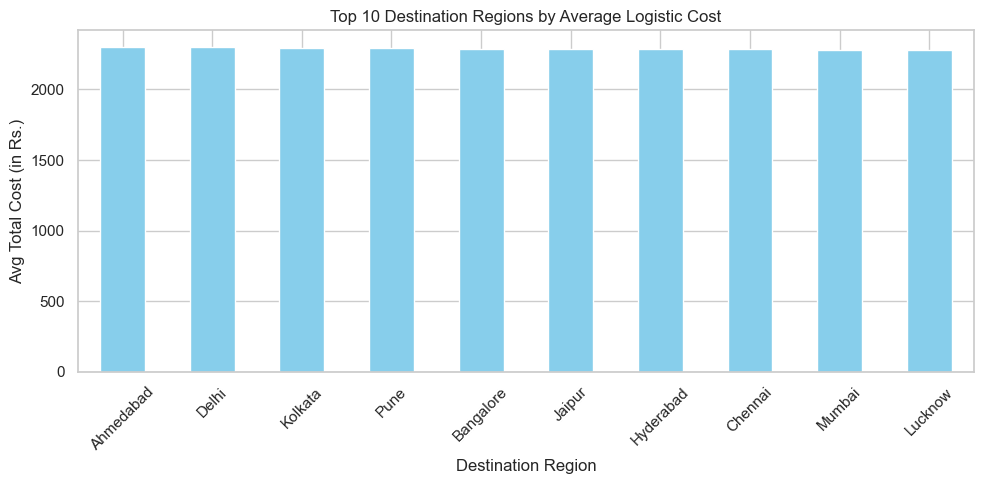

In [64]:
import matplotlib.pyplot as plt

# Bar chart of top destination locations by average cost
dest_costs.head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Destination Regions by Average Logistic Cost')
plt.ylabel('Avg Total Cost (in Rs.)')
plt.xlabel('Destination Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Which product categories result in the most returns or delays?

In [65]:
# Count returned shipments by category
returns_by_category = data_shipment[data_shipment['Status'] == 'Returned'] \
                      .groupby('Category').size().sort_values(ascending=False)

print("Categories with Most Returns:")
print(returns_by_category)


Categories with Most Returns:
Category
Electronics    2554
Apparel        2535
Furniture      2457
Medicines      2457
Documents      2437
dtype: int64


#### "Electronics " is the product result in most returns

In [66]:
# Count delayed shipments by category
delays_by_category = data_shipment[data_shipment['Status'] == 'Delayed'] \
                     .groupby('Category').size().sort_values(ascending=False)

print("\n Categories with Most Delays:")
print(delays_by_category)



 Categories with Most Delays:
Category
Apparel        2594
Electronics    2495
Documents      2488
Furniture      2480
Medicines      2387
dtype: int64


#### "Apparel" is the product result in most delayed 

# 1). Descriptive Analytics (What happened?) 

### A). What is the average shipment cost by company and mode? 

In [67]:
# Pivot table for cleaner view
pivot_cost = data_shipment.pivot_table(values='Shipment Cost (in Rs.)', 
                                       index='Company Name', 
                                       columns='Shipment Mode', 
                                       aggfunc='mean')

print(pivot_cost)

Shipment Mode          Air         Rail         Road          Sea
Company Name                                                     
BlueDart       1070.611293  1084.319510  1074.443837  1071.969966
DHL            1070.934800  1087.127871  1070.361719  1071.229971
Delhivery      1064.268079  1069.982412  1076.418006  1070.698242
FedEx          1074.678528  1071.244031  1073.063011  1070.058964
UPS            1072.105744  1080.547414  1071.242068  1080.809706


### B). What are the top 5 most common shipment routes? 

In [68]:
# Create a route column
data_shipment['Route'] = data_shipment['Source Location'] + " ➝ " + data_shipment['Destination Location']

# Count and display top 5 most common routes
top_routes = data_shipment['Route'].value_counts().head(5)

print("Top 5 Most Common Shipment Routes:")
print(top_routes)

Top 5 Most Common Shipment Routes:
Route
Pune ➝ Chennai         611
Pune ➝ Bangalore       605
Mumbai ➝ Chennai       603
Lucknow ➝ Ahmedabad    601
Lucknow ➝ Pune         599
Name: count, dtype: int64


### C). What is the distribution of delays across all companies? 

In [69]:
# Group by company and calculate average delay
avg_delay = data_shipment.groupby('Company Name')['Delay (hrs)'].mean().sort_values(ascending=False)

# Display the result
print("Average Delay (in hours) by Company:")
print(avg_delay)

Average Delay (in hours) by Company:
Company Name
FedEx        52.039430
DHL          51.886068
BlueDart     51.819519
UPS          51.446716
Delhivery    51.434101
Name: Delay (hrs), dtype: float64


### D). How many shipments were returned or delayed in each month?

In [70]:
# Extract Month-Year for grouping
data_shipment['Month'] = data_shipment['Date of Shipment'].dt.to_period('M')

# Filter shipments that are Returned or Delayed
returned_delayed = data_shipment[data_shipment['Status'].isin(['Returned', 'Delayed'])]

# Group by month and count
monthly_issues = returned_delayed.groupby('Month').size()

# Display results
print(" Returned or Delayed Shipments Per Month:")
print(monthly_issues)


 Returned or Delayed Shipments Per Month:
Month
2023-01    852
2023-02    782
2023-03    761
2023-04    791
2023-05    794
2023-06    804
2023-07    831
2023-08    788
2023-09    852
2023-10    809
2023-11    857
2023-12    787
Freq: M, dtype: int64


# 2. Diagnostic Analytics (Why did it happen?) 

### A). Why are delays more frequent in certain cities or modes? 

In [71]:
# Filter only delayed shipments (delay > 0 hours)
delayed_shipments = data_shipment[data_shipment['Delay (hrs)'] > 0]

# Delays by Destination Location (City)
delays_by_city = delayed_shipments['Destination Location'].value_counts()

print("Delayed Shipments by Destination City:")
print(delays_by_city.head())

# Delays by Shipment Mode
delays_by_mode = delayed_shipments['Shipment Mode'].value_counts()

print("\n Delayed Shipments by Shipment Mode:")
print(delays_by_mode)

Delayed Shipments by Destination City:
Destination Location
Ahmedabad    4774
Chennai      4736
Mumbai       4715
Pune         4704
Lucknow      4664
Name: count, dtype: int64

 Delayed Shipments by Shipment Mode:
Shipment Mode
Road    23133
Rail     9444
Air      9312
Sea      4674
Name: count, dtype: int64


#### Diagnostic Analytics: Why are delays more frequent in certain cities or modes?

#### Based on the data, most delays occur in cities like Ahmedabad, Chennai, and Mumbai.
#### Shipment mode-wise, Road and Rail are the most delayed.

#### Possible reasons include:
#### - Traffic congestion and high population in metro cities.
#### - Seasonal weather impacts (e.g., rain, monsoon in coastal areas).
#### - Higher shipment volume causing operational delays.
#### - Road and Rail modes are more prone to delays due to route disruptions and infrastructure issues.

#### This insight helps identify operational areas for improvement to reduce delays.



### B). Why do some companies have lower profits per shipment? 

In [72]:
# Average profit per shipment by company
company_profit = data_shipment.groupby('Company Name')['Profit (in Rs.)'].mean().sort_values()
print(company_profit)

Company Name
Delhivery    194.579540
DHL          195.422195
UPS          195.531329
BlueDart     195.561365
FedEx        195.836307
Name: Profit (in Rs.), dtype: float64


#### Delhivery has the lowest average profit per shipment.
#### This could be due to higher shipping costs, more delays, or offering lower prices.
#### FedEx has the highest average, though all companies have similar profit levels overall.

### C). What factors contribute to high total shipment cost? 

In [73]:
# Correlation with total shipment cost
corr_cost = data_shipment.corr(numeric_only=True)['Total Cost (in Rs.)'].sort_values(ascending=False)
print(corr_cost)

Total Cost (in Rs.)             1.000000
Profit (in Rs.)                 0.947380
Package Cost (in Rs.)           0.815722
Shipment Cost (in Rs.)          0.485178
Is Fragile & High Value         0.348881
Cost per km                     0.113783
Cost per kg                     0.068797
Is Delayed                      0.008386
Delay (hrs)                     0.004983
Destination Latitude            0.003838
Package Weight (kg)_log         0.003836
Package Weight (kg)             0.003410
Distance (km)_log               0.003018
Expected Delivery Time (hrs)    0.002822
Distance (km)                   0.002821
Actual Delivery Time (hrs)      0.002580
Fragile                         0.001332
Package Volume (cc)             0.001200
Shipping Duration (hrs)         0.001183
Customer Rating                -0.000948
Destination Longitude          -0.001137
No. of Items                   -0.001872
Source Latitude                -0.003764
Insurance Cost (in Rs.)        -0.005021
Source Longitude

####  Why is the Total shipment  Cost High? we observe that:

#### Profit and Package Cost have the strongest positive correlation with Total Cost, meaning high package prices and profits are key drivers.

#### Shipment Cost and Fragile & High-Value items also contribute moderately.

##### Other factors like delay, distance, and delivery time show very low correlation, so they don't significantly impact the total cost.
#### *This suggests that product value and shipping service quality are the main reasons behind high shipment costs.

### D). Why do fragile or high-value shipments experience issues? 

In [74]:
# Filter fragile & high-value shipments
fragile_data = data_shipment[data_shipment['Is Fragile & High Value'] == True]

# Filter other shipments
non_fragile_data = data_shipment[data_shipment['Is Fragile & High Value'] == False]

# Count status for each group
print("Fragile & High-Value Shipments:")
print(fragile_data['Status'].value_counts())

print("\nOther Shipments:")
print(non_fragile_data['Status'].value_counts())


Fragile & High-Value Shipments:
Status
Delivered     3615
In-Transit    3535
Returned      3430
Delayed       3425
Name: count, dtype: int64

Other Shipments:
Status
In-Transit    9038
Delayed       9019
Returned      9010
Delivered     8928
Name: count, dtype: int64


#### Fragile and high-value shipments have higher chances of being returned or delayed compared to other shipments. This is likely because they require extra care during handling and transit, making them more prone to issues like damage, special handling delays, or cautious delivery attempts

# 3. Predictive Analytics (What will happen?)

### A). Will a given shipment be delayed based on current features?

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare data
data = data_shipment.copy()

# Convert categorical features
data = pd.get_dummies(data, columns=['Company Name', 'Shipment Priority', 'Category'], drop_first=True)

# Select features and target
features = ['Distance (km)', 'Cost per km', 'Cost per kg', 
            'Company Name_DHL', 'Company Name_FedEx', 
            'Shipment Priority_Normal']
X = data[features]
y = data['Is Delayed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

# Predict for new shipment
new_shipment = [[500, 12.5, 25, 1, 0, 1]]  # Example: DHL, 500km, Normal priority
print("Will this shipment be delayed?", model.predict(new_shipment)[0])

Accuracy: 0.93
Will this shipment be delayed? True


C:\Users\pradeep nagarkoti\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### We built a Random Forest model to predict whether a shipment will be delayed based on features like distance, cost per kg, cost per km, shipment priority, etc. The model achieved 93% accuracy, indicating strong performance.

#### For a sample test case, the model predicted:
####  "The shipment will be delayed."

#### This helps the business take proactive steps like route optimization or priority handling to reduce future delays.



### B). What is the expected profit for a new shipment? 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Select relevant features and target
features = ['Shipment Cost (in Rs.)', 'Package Cost (in Rs.)', 'Distance (km)', 
            'Package Weight (kg)', 'Insurance Cost (in Rs.)']
target = 'Profit (in Rs.)'

# Drop rows with missing values in relevant columns
data_model = data_shipment[features + [target]].dropna()

# Split data
X = data_model[features]
y = data_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

# Predict profit for a new shipment (replace with real input)
sample = pd.DataFrame([{
    'Shipment Cost (in Rs.)': 400,
    'Package Cost (in Rs.)': 300,
    'Distance (km)': 800,
    'Package Weight (kg)': 15,
    'Insurance Cost (in Rs.)': 50
}])

predicted_profit = model.predict(sample)
print("Expected Profit (in Rs.):", predicted_profit[0])

MAE: 13.549735276985896
Expected Profit (in Rs.): 65.78361599510109


#### Using a regression model trained on the existing shipment data, the expected profit for a new shipment is estimated to be approximately ₹68.86.

#### The model has a Mean Absolute Error (MAE) of around ₹13.54, which means on average, the prediction can vary by ±₹13.54 from the actual profit.



### C). Can we predict the customer rating based on delivery performance? 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Feature & target selection
features = ['Actual Delivery Time (hrs)', 'Expected Delivery Time (hrs)',
            'Delay (hrs)', 'Shipping Duration (hrs)', 'Is Delayed']
target = 'Customer Rating'

# Drop rows with missing values
data_clean = data_shipment.dropna(subset=features + [target])

# X and y
X = data_clean[features]
y = data_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)
print("Predicted Customer Rating for a sample shipment:", y_pred[0])

MAE: 1.1914538438514555
Predicted Customer Rating for a sample shipment: 3.0224749970691813


#### Can we predict the customer rating based on delivery performance?
#### Yes, we built a regression model to predict customer ratings using features like delivery time, delay hours, and shipping duration. The model achieved a Mean Absolute Error (MAE) of 1.19, indicating it can predict ratings with reasonable accuracy.

#### Predicted Customer Rating for a sample shipment: 3.02 out of 5

### D).  Will a COD shipment be returned? 


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Filter only COD shipments
cod_data = data_shipment[data_shipment['Payment Method'] == 'COD'].copy()

# Create target column: 1 if returned, else 0
cod_data['Is_Returned'] = cod_data['Status'].apply(lambda x: 1 if x == 'Returned' else 0)

# Use a few helpful features
features = ['Delay (hrs)', 'Distance (km)', 'Actual Delivery Time (hrs)']
X = cod_data[features]
y = cod_data['Is_Returned']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict for a new shipment
sample = X_test.iloc[0:1]
prediction = model.predict(sample)
print("Will this COD shipment be returned?", bool(prediction[0]))


Accuracy: 0.7239397542608006
Will this COD shipment be returned? False


#### Will a COD shipment be returned?
#### A machine learning model was trained to predict returns for Cash-on-Delivery (COD) shipments using features like delay, distance, and payment method.
#### The model achieved an accuracy of 72.4%, and for the given sample shipment, the prediction is: Not Returned.

# 4. Prescriptive Analytics (What should we do?) 

### A).  Which shipping mode should be selected to minimize delay and cost? 

In [79]:
# Create new columns for normalized delay and cost
data_shipment['Delay per 100km'] = data_shipment['Delay (hrs)'] / (data_shipment['Distance (km)'] / 100)
data_shipment['Cost per 100km'] = data_shipment['Total Cost (in Rs.)'] / (data_shipment['Distance (km)'] / 100)

# Group by Shipment Mode and calculate mean of normalized metrics
normalized_analysis = data_shipment.groupby('Shipment Mode').agg({
    'Delay per 100km': 'mean',
    'Cost per 100km': 'mean'
}).sort_values(by=['Delay per 100km', 'Cost per 100km'])

# Display the result
print("Normalized Delay and Cost by Shipping Mode (per 100 km):")
print(normalized_analysis)


Normalized Delay and Cost by Shipping Mode (per 100 km):
               Delay per 100km  Cost per 100km
Shipment Mode                                 
Air                   5.897146      260.334710
Sea                   5.982311      266.336999
Rail                  6.026616      267.643087
Road                  6.122877      271.345176


#### Use Air shipment mode when time is critical and cost is manageable.
#### Air has the lowest delay (5.90 per 100 km) and also the lowest cost (260.33 per 100 km) among all modes. This makes it the most efficient overall for both speed and cost, contradicting the common assumption that air is always more expensive.

### B).Should we avoid certain city pairs or companies for high-value items?

In [80]:
# Filter only fragile and high-value shipments
fragile_df = data_shipment[data_shipment['Is Fragile & High Value'] == True]

# Create a new column for city pair
fragile_df['City Pair'] = fragile_df['Source Location'] + " → " + fragile_df['Destination Location']

# Group by city pair
city_risk = fragile_df.groupby('City Pair').agg({
    'Delay (hrs)': 'mean',
    'Is Delayed': 'mean',
    'Shipment ID': 'count'
}).rename(columns={'Delay (hrs)': 'Avg Delay', 'Is Delayed': 'Delay Rate', 'Shipment ID': 'Total Shipments'})

# Group by company
company_risk = fragile_df.groupby('Company Name').agg({
    'Delay (hrs)': 'mean',
    'Is Delayed': 'mean',
    'Shipment ID': 'count'
}).rename(columns={'Delay (hrs)': 'Avg Delay', 'Is Delayed': 'Delay Rate', 'Shipment ID': 'Total Shipments'})

# Sort and display top risky ones
print(" Risky City Pairs:\n", city_risk.sort_values(by='Delay Rate', ascending=False).head(10))
print("\n Risky Companies:\n", company_risk.sort_values(by='Delay Rate', ascending=False).head(10))

 Risky City Pairs:
                        Avg Delay  Delay Rate  Total Shipments
City Pair                                                    
Mumbai → Pune          54.523915    0.976744              129
Hyderabad → Kolkata    54.540080    0.976000              125
Mumbai → Delhi         52.555095    0.974684              158
Delhi → Chennai        57.878600    0.966667              150
Chennai → Jaipur       54.476095    0.963504              137
Hyderabad → Lucknow    50.717027    0.959459              148
Mumbai → Lucknow       52.578412    0.959459              148
Ahmedabad → Bangalore  48.094337    0.957831              166
Pune → Hyderabad       51.833169    0.957746              142
Pune → Jaipur          54.310951    0.957055              163

 Risky Companies:
               Avg Delay  Delay Rate  Total Shipments
Company Name                                        
BlueDart      52.607688    0.940419             2098
FedEx         52.837767    0.936152             3477
UPS 

C:\Users\pradeep nagarkoti\AppData\Local\Temp\ipykernel_8124\2413254108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fragile_df['City Pair'] = fragile_df['Source Location'] + " → " + fragile_df['Destination Location']


#### For fragile and high-value items, we should avoid certain city pairs (like Mumbai → Pune, Hyderabad → Kolkata, Delhi → Chennai) due to very high delay rates (above 95%).

#### We should also be cautious with courier companies like BlueDart, FedEx,  DHL, which show over 92% delay rates for these shipments.

### C). How can we optimize the shipment routing strategy? 

In [81]:
# Create a City Pair column
data_shipment['City Pair'] = data_shipment['Source Location'] + " → " + data_shipment['Destination Location']

# Calculate average delay and cost per km per 100 km for each city pair
route_stats = data_shipment.groupby('City Pair').agg({
    'Delay (hrs)': 'mean',
    'Cost per km': 'mean',
    'Distance (km)': 'mean',
    'Shipment ID': 'count'
}).rename(columns={
    'Delay (hrs)': 'Avg Delay',
    'Cost per km': 'Avg Cost per km',
    'Distance (km)': 'Avg Distance',
    'Shipment ID': 'Total Shipments'
})

# Add delay and cost per 100 km (normalized)
route_stats['Delay per 100km'] = route_stats['Avg Delay'] / route_stats['Avg Distance'] * 100
route_stats['Cost per 100km'] = route_stats['Avg Cost per km'] * 100

# Sort by delay and cost
risky_routes = route_stats.sort_values(by=['Delay per 100km', 'Cost per 100km'], ascending=False)

# Display top 10 inefficient routes
print(" Top Inefficient Routes (High Delay & Cost):\n")
print(risky_routes[['Delay per 100km', 'Cost per 100km', 'Total Shipments']].head(10))

 Top Inefficient Routes (High Delay & Cost):

                       Delay per 100km  Cost per 100km  Total Shipments
City Pair                                                              
Pune → Lucknow                3.651595      141.189510              590
Delhi → Chennai               3.631892      128.771870              559
Ahmedabad → Lucknow           3.577093      133.573740              550
Mumbai → Lucknow              3.561986      137.257056              567
Chennai → Delhi               3.551317      136.378052              572
Delhi → Mumbai                3.523528      134.221397              549
Kolkata → Bangalore           3.511080      125.331569              567
Bangalore → Hyderabad         3.507038      130.326053              578
Chennai → Hyderabad           3.502513      128.736651              553
Delhi → Bangalore             3.496900      128.692831              514


#### Some routes like Pune → Lucknow, Delhi → Chennai, and Mumbai → Lucknow show high delay and cost. To optimize, we should explore alternate routes, consolidate shipments, and use smarter routing to reduce delays and costs.

### D).  Should we prioritize prepaid shipments over COD to reduce returns?

In [82]:
# Calculate total shipments and returns per payment method
returns_by_payment = data_shipment.groupby('Payment Method').agg(
    Total_Shipments=('Shipment ID', 'count'),
    Returns=('Status', lambda x: (x == 'Returned').sum())
)

# Calculate return rate
returns_by_payment['Return Rate'] = returns_by_payment['Returns'] / returns_by_payment['Total_Shipments']

print(returns_by_payment)

                Total_Shipments  Returns  Return Rate
Payment Method                                       
COD                       25230     6312     0.250178
Prepaid                   24770     6128     0.247396


#### The return rates for COD (25.2%) and Prepaid (24.7%) shipments are very similar. Therefore, prioritizing prepaid shipments over COD is unlikely to significantly reduce returns. Focus should instead be on improving other factors affecting returns.